import functions

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras.utils import to_categorical
from keras.applications import ResNet152, VGG19, InceptionV3, InceptionResNetV2, EfficientNetB0
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Input
from keras.applications.resnet import preprocess_input as resnet_preprocess
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess
from keras.applications.inception_v3 import preprocess_input as inceptionv3_preprocess
from keras.applications.inception_resnet_v2 import preprocess_input as inceptionresnet_preprocess
from keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from sklearn.metrics import precision_score, recall_score, f1_score

selecting dataset directry

In [2]:
dataset_dir = "C:/Users/suhas/cbk/coding/ALL_IDB2/ALL_IDB2/img"

In [3]:
import matplotlib.pyplot as plt

def display_sample_images1(images):
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

as we are using inception based and others, the inception requirs image size(299, 299) and other models size(224,224) so we are using two preprocessing techniques named load_dataset1 and load_dataset2

In [4]:

def load_dataset1(dataset_dir):
    X = []
    y = []

    # Read images and labels from the dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".tif"):
                image_path = os.path.join(root, file)
                class_label = int(file[6])  # Extract the class label from the seventh character

                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                resized_image = cv2.resize(image, (224, 224))

                X.append(resized_image)
                y.append(class_label)

    # Convert the lists to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    display_sample_images1(X_train)

    return X_train, X_test, y_train, y_test

In [5]:


def load_dataset2(dataset_dir):
    X = []
    y = []

    # Read images and labels from the dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".tif"):
                image_path = os.path.join(root, file)
                class_label = int(file[6])  # Extract the class label from the seventh character

                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Resize the image to a fixed shape
                resized_image = cv2.resize(image, (299, 299))

                X.append(resized_image)
                y.append(class_label)

    # Convert the lists to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    display_sample_images1(X_train)
    return X_train, X_test, y_train, y_test





In [6]:
def create_resnet152_model():
    input_tensor = Input(shape=(224, 224, 3))
    base_model = ResNet152(input_tensor=input_tensor, include_top=False, weights="imagenet")
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

def create_vgg19_model():
    input_tensor = Input(shape=(224, 224, 3))
    base_model = VGG19(input_tensor=input_tensor, include_top=False, weights="imagenet")
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

def create_inceptionv3_model():
    input_tensor = Input(shape=(299, 299, 3))
    base_model = InceptionV3(input_tensor=input_tensor, include_top=False, weights="imagenet")
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

def create_inceptionresnetv2_model():
    input_tensor = Input(shape=(299, 299, 3))
    base_model = InceptionResNetV2(input_tensor=input_tensor, include_top=False, weights="imagenet")
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

def create_efficientnetb0_model():
    input_tensor = Input(shape=(224, 224, 3))
    base_model = EfficientNetB0(input_tensor=input_tensor, include_top=False, weights="imagenet")
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

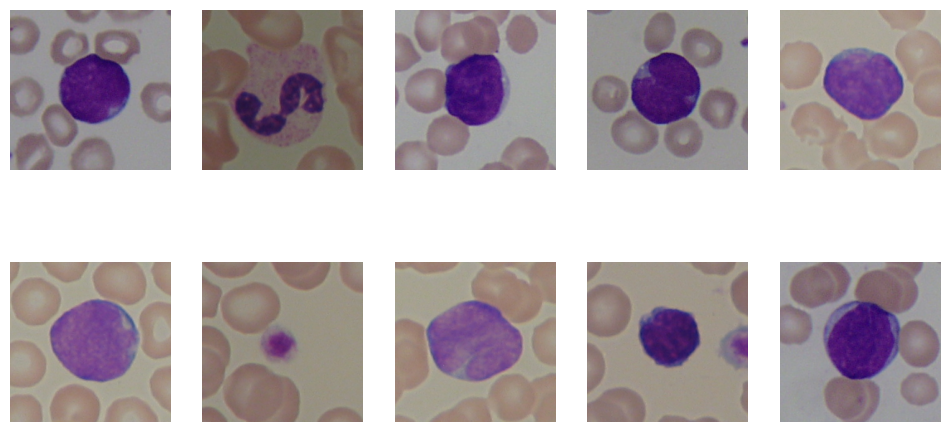

In [7]:
X_train, X_test, y_train, y_test = load_dataset1(dataset_dir)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

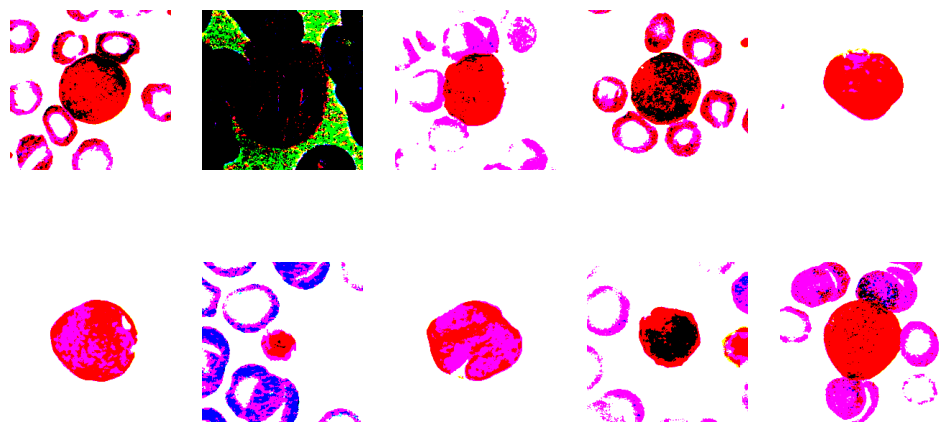

In [8]:
# Preprocess images
preprocessed_X_train = resnet_preprocess(X_train)
preprocessed_X_test = resnet_preprocess(X_test)
display_sample_images1(preprocessed_X_train)


In [9]:
model = create_resnet152_model()

In [10]:
# Extract features using the model
X_features_train = model.predict(preprocessed_X_train)
X_features_test = model.predict(preprocessed_X_test)


2/2 [==============================] - 8s 3s/step


In [11]:
# Extract features using the model
X_features_train = model.predict(preprocessed_X_train)
X_features_test = model.predict(preprocessed_X_test)

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_features_train, y_train)

# Predict using the hybrid model
predictions = svm_model.predict(X_features_test)

# Evaluate the hybrid model
rs_accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Hybrid Model Accuracy:", rs_accuracy)


2/2 [==============================] - 8s 3s/step
Precision: 0.9583333333333334
Recall: 0.9583333333333334
F1 Score: 0.9583333333333334
Hybrid Model Accuracy: 0.9615384615384616


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

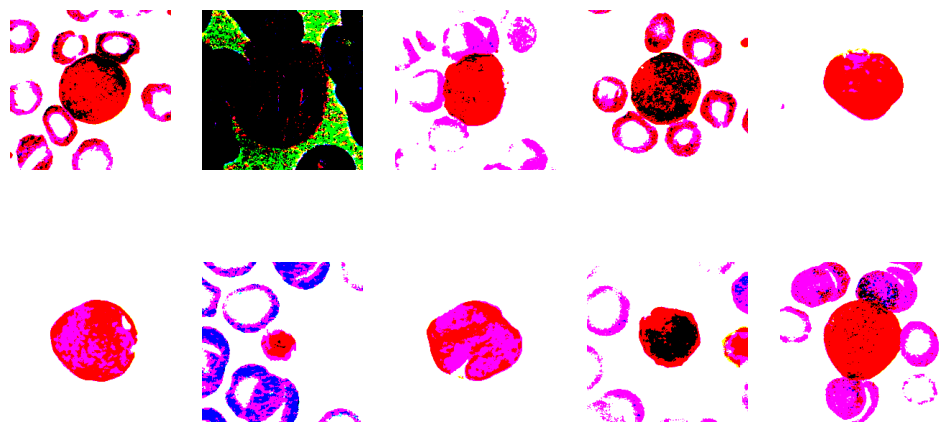

In [12]:
# Preprocess images
preprocessed_X_train = vgg19_preprocess(X_train)
preprocessed_X_test = vgg19_preprocess(X_test)
display_sample_images1(preprocessed_X_train)


In [13]:
model = create_vgg19_model()

In [14]:
# Extract features using the model
X_features_train = model.predict(preprocessed_X_train)
X_features_test = model.predict(preprocessed_X_test)

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_features_train, y_train)

# Predict using the hybrid model
predictions = svm_model.predict(X_features_test)

# Evaluate the hybrid model
vgs_accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Hybrid Model Accuracy:", vgs_accuracy)


2/2 [==============================] - 9s 3s/step
Precision: 0.9130434782608695
Recall: 0.875
F1 Score: 0.8936170212765957
Hybrid Model Accuracy: 0.9038461538461539


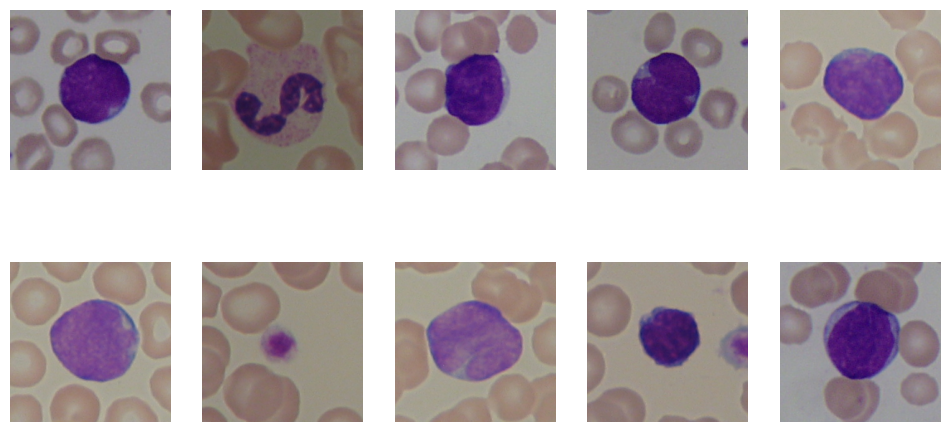

In [15]:
# Preprocess images
preprocessed_X_train = efficientnet_preprocess(X_train)
preprocessed_X_test = efficientnet_preprocess(X_test)
display_sample_images1(preprocessed_X_train)


In [16]:
# Extract features using the model
X_features_train = model.predict(preprocessed_X_train)
X_features_test = model.predict(preprocessed_X_test)


2/2 [==============================] - 9s 4s/step


In [17]:
# Train the SVM model
svm_model = SVC()
svm_model.fit(X_features_train, y_train)


SVC()

In [18]:
# Predict using the hybrid model
predictions = svm_model.predict(X_features_test)

# Evaluate the hybrid model
efs_accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Hybrid Model Accuracy:", efs_accuracy)


Precision: 0.9545454545454546
Recall: 0.875
F1 Score: 0.9130434782608695
Hybrid Model Accuracy: 0.9230769230769231


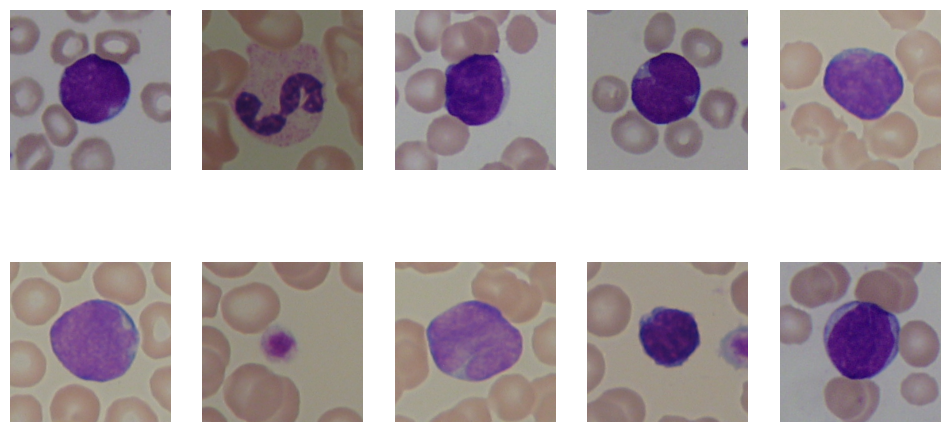

In [19]:
X_train, X_test, y_train, y_test = load_dataset2(dataset_dir)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

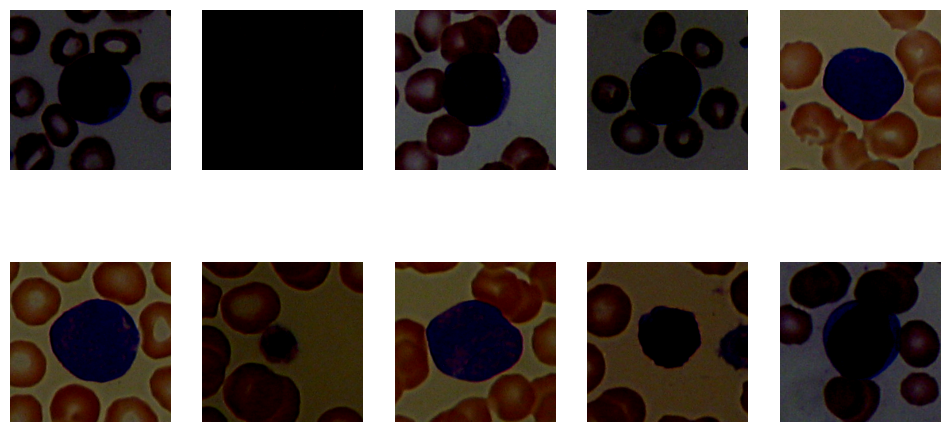

In [20]:
# Preprocess images
preprocessed_X_train = inceptionv3_preprocess(X_train)
preprocessed_X_test = inceptionv3_preprocess(X_test)
display_sample_images1(preprocessed_X_train)


In [21]:
model = create_inceptionv3_model()


In [22]:
# Extract features using the model
X_features_train = model.predict(preprocessed_X_train)
X_features_test = model.predict(preprocessed_X_test)

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_features_train, y_train)

# Predict using the hybrid model
predictions = svm_model.predict(X_features_test)

# Evaluate the hybrid model
ins_accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Hybrid Model Accuracy:", ins_accuracy)


2/2 [==============================] - 3s 1s/step
Precision: 1.0
Recall: 0.9583333333333334
F1 Score: 0.9787234042553191
Hybrid Model Accuracy: 0.9807692307692307


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

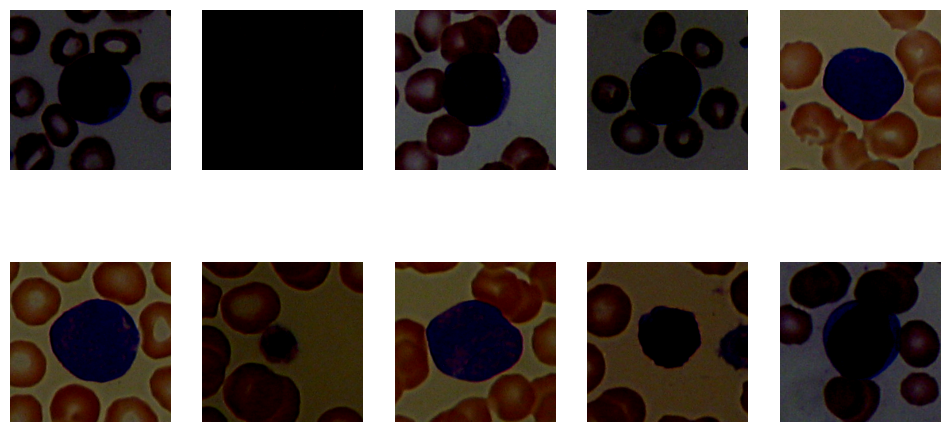

In [23]:
# Preprocess images
preprocessed_X_train = inceptionresnet_preprocess(X_train)
preprocessed_X_test = inceptionresnet_preprocess(X_test)
display_sample_images1(preprocessed_X_train)


In [24]:
model = create_inceptionresnetv2_model()


In [25]:
# Extract features using the model
X_features_train = model.predict(preprocessed_X_train)
X_features_test = model.predict(preprocessed_X_test)


2/2 [==============================] - 8s 3s/step


In [26]:
# Train the SVM model
svm_model = SVC()
svm_model.fit(X_features_train, y_train)


SVC()

In [27]:
# Predict using the hybrid model
predictions = svm_model.predict(X_features_test)

# Evaluate the hybrid model
irs_accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Hybrid Model Accuracy:", irs_accuracy)


Precision: 1.0
Recall: 0.9166666666666666
F1 Score: 0.9565217391304348
Hybrid Model Accuracy: 0.9615384615384616


random forest

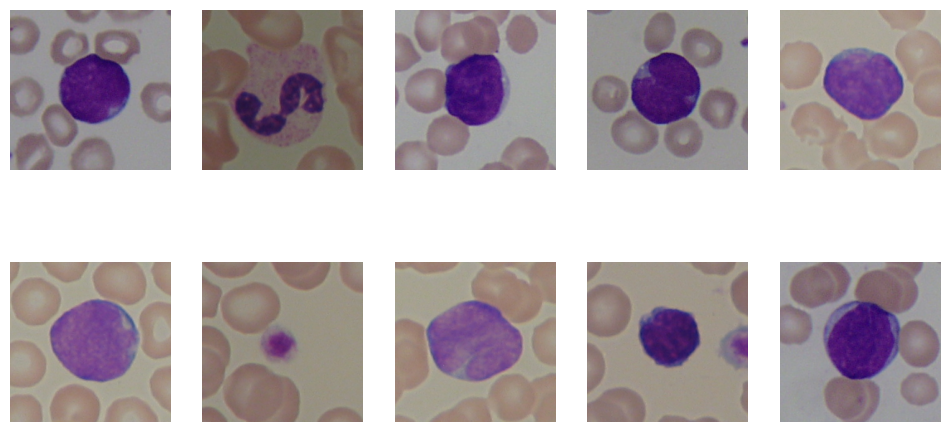

In [28]:
X_train, X_test, y_train, y_test = load_dataset1(dataset_dir)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

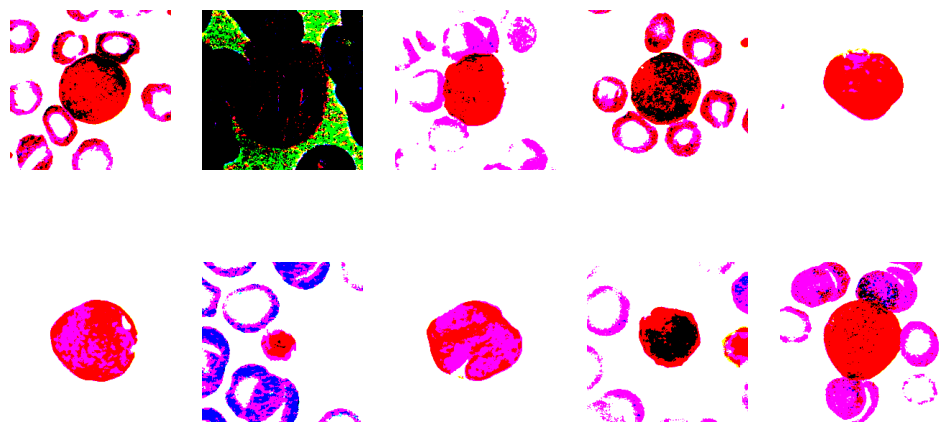

In [29]:
# Preprocess images
preprocessed_X_train = resnet_preprocess(X_train)
preprocessed_X_test = resnet_preprocess(X_test)
display_sample_images1(preprocessed_X_train)


In [30]:
model = create_resnet152_model()


In [31]:
# Extract features using the model
X_features_train = model.predict(preprocessed_X_train)
X_features_test = model.predict(preprocessed_X_test)


2/2 [==============================] - 8s 3s/step


In [32]:
# Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_features_train, y_train)


RandomForestClassifier()

In [33]:
# Predict using the hybrid model
predictions = rf_model.predict(X_features_test)

# Evaluate the hybrid model
rr_accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Hybrid Model Accuracy:", rr_accuracy)


Precision: 0.9166666666666666
Recall: 0.9166666666666666
F1 Score: 0.9166666666666666
Hybrid Model Accuracy: 0.9230769230769231


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

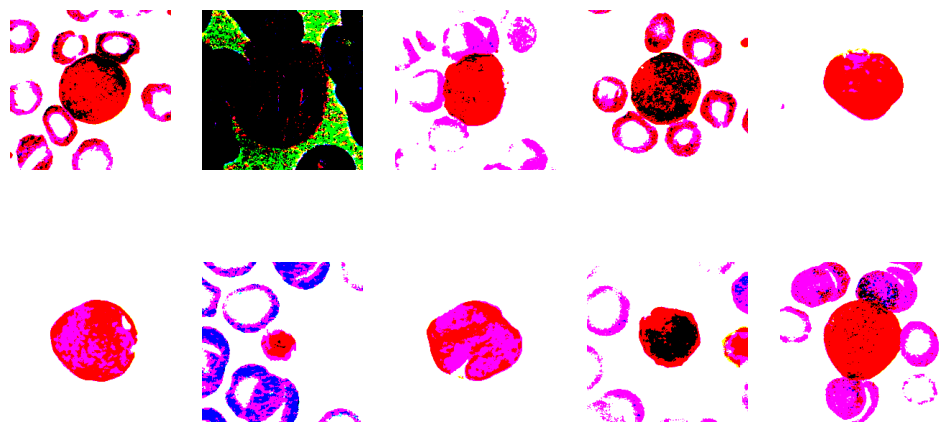

In [34]:
# Preprocess images
preprocessed_X_train = vgg19_preprocess(X_train)
preprocessed_X_test = vgg19_preprocess(X_test)
display_sample_images1(preprocessed_X_train)


In [35]:
model = create_vgg19_model()


In [36]:
# Extract features using the model
X_features_train = model.predict(preprocessed_X_train)
X_features_test = model.predict(preprocessed_X_test)


2/2 [==============================] - 10s 4s/step


In [37]:
# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_features_train, y_train)


RandomForestClassifier()

In [38]:
# Predict using the hybrid model
predictions = rf_model.predict(X_features_test)

# Evaluate the hybrid model
vgr_accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Hybrid Model Accuracy:", vgr_accuracy)


Precision: 0.9565217391304348
Recall: 0.9166666666666666
F1 Score: 0.9361702127659574
Hybrid Model Accuracy: 0.9423076923076923


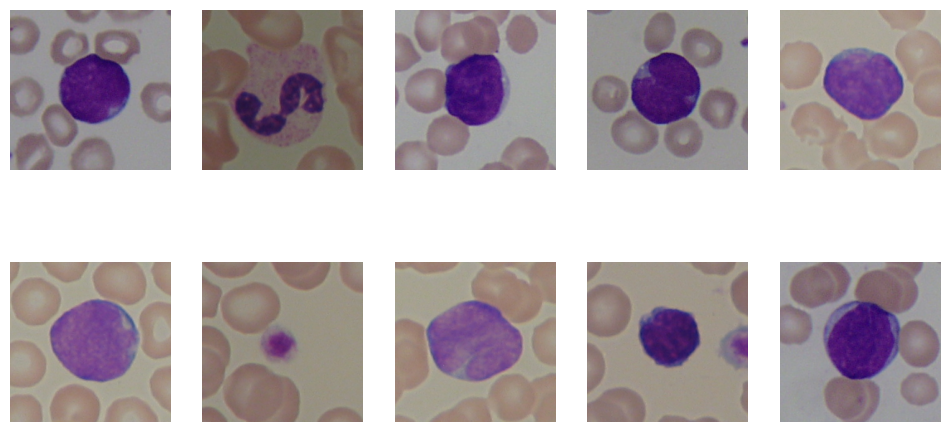

2/2 [==============================] - 2s 600ms/step
Precision: 0.8846153846153846
Recall: 0.9583333333333334
F1 Score: 0.9199999999999999
Hybrid Model Accuracy: 0.9230769230769231


In [39]:
# Preprocess images
preprocessed_X_train = efficientnet_preprocess(X_train)
preprocessed_X_test = efficientnet_preprocess(X_test)
display_sample_images1(preprocessed_X_train)

model = create_efficientnetb0_model()

# Extract features using the model
X_features_train = model.predict(preprocessed_X_train)
X_features_test = model.predict(preprocessed_X_test)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_features_train, y_train)

# Predict using the hybrid model
predictions = rf_model.predict(X_features_test)

# Evaluate the hybrid model
efr_accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Hybrid Model Accuracy:", efr_accuracy)

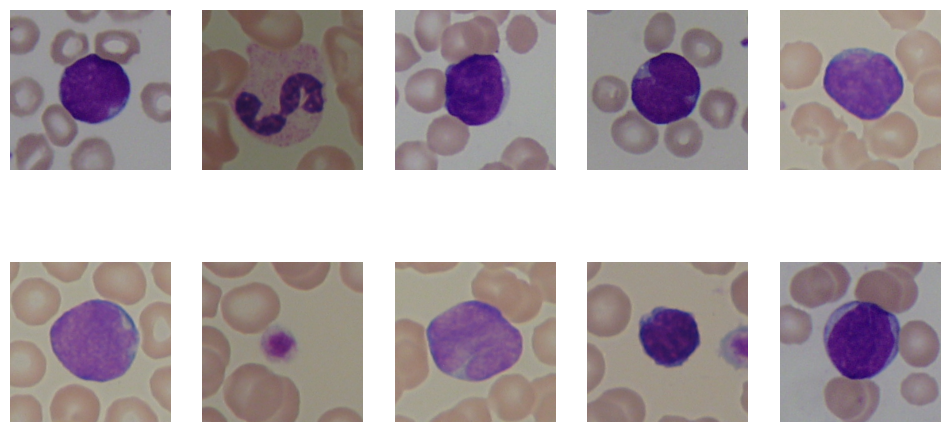

In [40]:
X_train, X_test, y_train, y_test = load_dataset2(dataset_dir)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

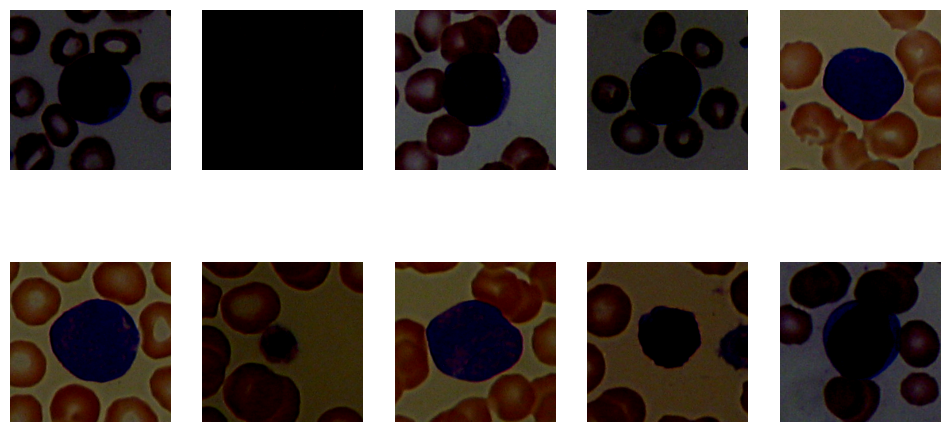

2/2 [==============================] - 4s 1s/step
Precision: 1.0
Recall: 0.9583333333333334
F1 Score: 0.9787234042553191
Hybrid Model Accuracy: 0.9807692307692307


In [41]:

# Preprocess images
preprocessed_X_train = inceptionv3_preprocess(X_train)
preprocessed_X_test = inceptionv3_preprocess(X_test)
display_sample_images1(preprocessed_X_train)

model = create_inceptionv3_model()

# Extract features using the model
X_features_train = model.predict(preprocessed_X_train)
X_features_test = model.predict(preprocessed_X_test)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_features_train, y_train)

# Predict using the hybrid model
predictions = rf_model.predict(X_features_test)

# Evaluate the hybrid model
inr_accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Hybrid Model Accuracy:", inr_accuracy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

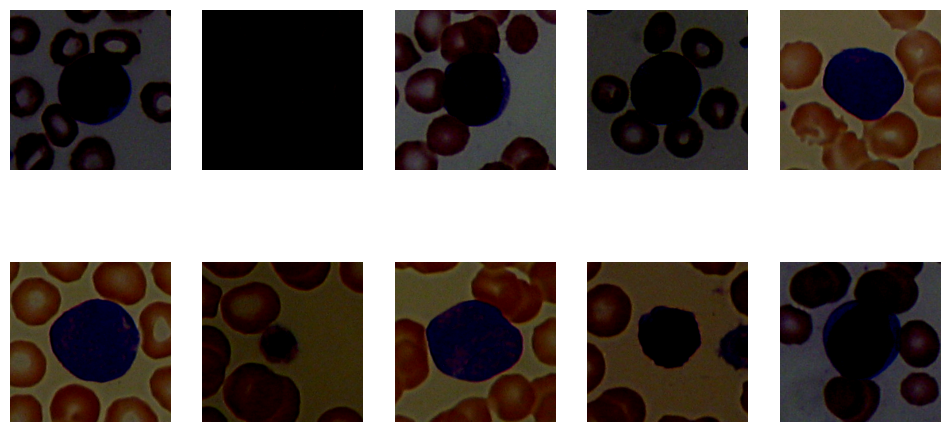

2/2 [==============================] - 8s 3s/step
Precision: 1.0
Recall: 0.9166666666666666
F1 Score: 0.9565217391304348
Hybrid Model Accuracy: 0.9615384615384616


In [42]:
preprocessed_X_train = inceptionresnet_preprocess(X_train)
preprocessed_X_test = inceptionresnet_preprocess(X_test)
display_sample_images1(preprocessed_X_train)

model = create_inceptionresnetv2_model()

# Extract features using the model
X_features_train = model.predict(preprocessed_X_train)
X_features_test = model.predict(preprocessed_X_test)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_features_train, y_train)

# Predict using the hybrid model
predictions = rf_model.predict(X_features_test)

# Evaluate the hybrid model
irr_accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Hybrid Model Accuracy:", irr_accuracy)


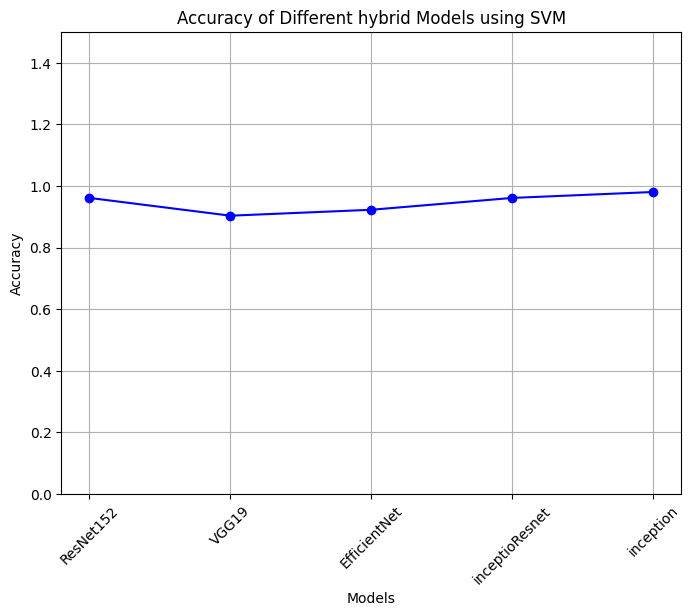

In [43]:
import matplotlib.pyplot as plt

# Define the models and their accuracies
models = ['ResNet152', 'VGG19', 'EfficientNet', 'inceptioResnet', 'inception']
accuracies = [rs_accuracy, vgs_accuracy, efs_accuracy, irs_accuracy, ins_accuracy]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different hybrid Models using SVM')
plt.ylim([0, 1.5])  # Set the y-axis limits from 0 to 1
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.grid(True)  # Add gridlines
plt.show()


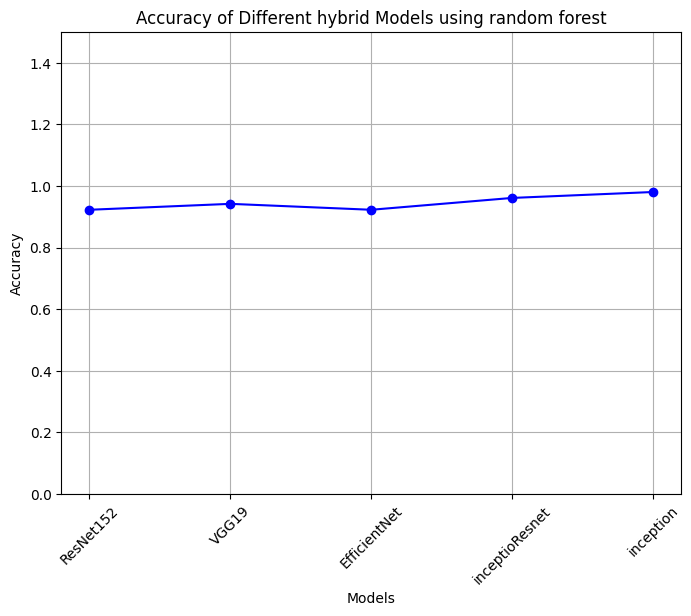

In [44]:
import matplotlib.pyplot as plt

# Define the models and their accuracies
models = ['ResNet152', 'VGG19', 'EfficientNet', 'inceptioResnet', 'inception']
accuracies = [rr_accuracy, vgr_accuracy, efr_accuracy, irr_accuracy, inr_accuracy]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different hybrid Models using random forest')
plt.ylim([0, 1.5])  # Set the y-axis limits from 0 to 1
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.grid(True)  # Add gridlines
plt.show()


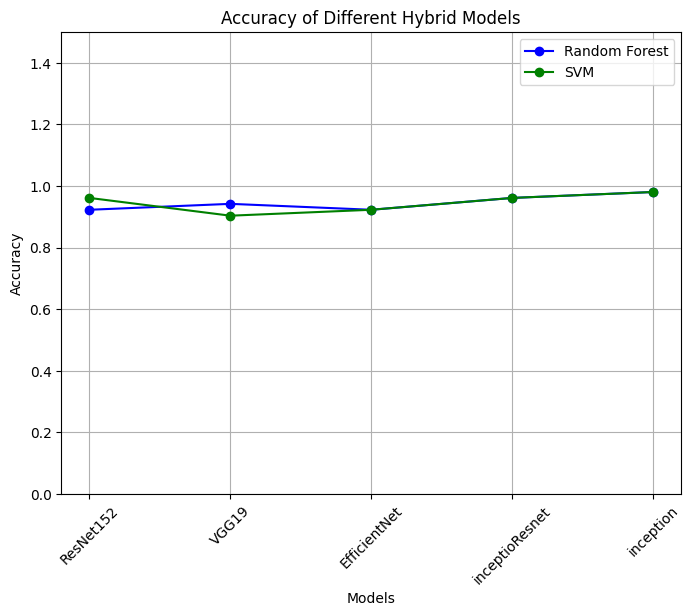

In [45]:
import matplotlib.pyplot as plt

# Define the models and their accuracies for random forest and SVM
models = ['ResNet152', 'VGG19', 'EfficientNet', 'inceptioResnet', 'inception']
rf_accuracies = [rr_accuracy, vgr_accuracy, efr_accuracy, irr_accuracy, inr_accuracy]
svm_accuracies = [rs_accuracy, vgs_accuracy, efs_accuracy, irs_accuracy, ins_accuracy]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(models, rf_accuracies, marker='o', linestyle='-', color='blue', label='Random Forest')
plt.plot(models, svm_accuracies, marker='o', linestyle='-', color='green', label='SVM')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Hybrid Models')
plt.ylim([0, 1.5])  # Set the y-axis limits from 0 to 1
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.grid(True)  # Add gridlines
plt.legend()  # Add a legend to differentiate between random forest and SVM
plt.show()
